In [1]:
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
plt.rcParams['image.cmap'] = 'gray'

In [2]:
import torch
use_cuda=torch.cuda.is_available()


from torchsummary import summary
import os
import datasets
import pytorch_models
import pytorch_experiment
import torch.optim as optim
dataset="cifar10"
(x_train, y_train), (x_test, y_test), input_shape,num_classes = datasets.get_data(dataset)


print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')





Using TensorFlow backend.
/home/facundo/.python/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
filters={"mnist":8,"mnist_rot":8,"cifar10":16}
fc_filters={"mnist":64,"mnist_rot":64,"cifar10":128}
model = pytorch_models.SimpleGConv(input_shape,num_classes,filters=filters[dataset]) 
if use_cuda:
    model=model.cuda()
    
parameters=pytorch_experiment.add_weight_decay(model.named_parameters(),1e-9)
# optimizer = optim.SGD(parameters, lr=0.001, momentum=0.9,weight_decay=1e-9)
optimizer = optim.Adam(parameters, lr=0.001,weight_decay=1e-9)

print(model)
#summary(model, input_size=[1,28,28])


SimpleGConv(
  (conv1): P4ConvZ2()
  (conv2): P4ConvP4()
  (conv3): P4ConvP4()
  (conv4): P4ConvP4()
  (conv5): P4ConvP4()
  (fc1): Linear(in_features=4096, out_features=32, bias=True)
  (bn1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=32, out_features=10, bias=True)
)


In [4]:
rotated_model=pytorch_models.SimpleGConv(input_shape,num_classes,filters=filters[dataset])
if use_cuda:
    rotated_model= rotated_model.cuda()

rotated_parameters=pytorch_experiment.add_weight_decay(rotated_model.named_parameters(),1e-9)
rotated_optimizer = optim.Adam(rotated_parameters, lr=0.001,weight_decay=1e-9)
# rotated_optimizer = optim.SGD(rotated_parameters, lr=0.001, momentum=0.9,weight_decay=1e-9)

print(rotated_model)
#summary(model, input_size=[1,28,28])


SimpleGConv(
  (conv1): P4ConvZ2()
  (conv2): P4ConvP4()
  (conv3): P4ConvP4()
  (conv4): P4ConvP4()
  (conv5): P4ConvP4()
  (fc1): Linear(in_features=4096, out_features=32, bias=True)
  (bn1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=32, out_features=10, bias=True)
)


Training model with unrotated dataset...


Epoch 1: 100% (batch 782/782)  ==stats==> loss:   1.21, accuracy:  0.593, Time:  0:00:41


Test => Loss: 1.2003, Accuracy: 59.83% (5983/10000)


Epoch 2: 100% (batch 782/782)  ==stats==> loss:   0.74, accuracy:  0.744, Time:  0:00:54


Test => Loss: 0.7343, Accuracy: 74.25% (7425/10000)


Epoch 3: 100% (batch 782/782)  ==stats==> loss:  0.564, accuracy:  0.802, Time:  0:02:06


Test => Loss: 0.7033, Accuracy: 75.97% (7597/10000)


Epoch 4: 100% (batch 782/782)  ==stats==> loss:  0.462, accuracy:  0.838, Time:  0:02:08


Test => Loss: 0.7245, Accuracy: 76.02% (7602/10000)


Epoch 5: 100% (batch 782/782)  ==stats==> loss:  0.376, accuracy:  0.867, Time:  0:02:04


Test => Loss: 0.7104, Accuracy: 77.37% (7737/10000)


Epoch 6: 100% (batch 782/782)  ==stats==> loss:   0.29, accuracy:  0.896, Time:  0:01:08


Test => Loss: 0.9230, Accuracy: 74.34% (7434/10000)


Epoch 7: 100% (batch 782/782)  ==stats==> loss:  0.243, accuracy:  0.912, Time:  0:00:58


Test => Loss: 0.8903, Accuracy: 76.82% (7682/10000)


Epoch 8: 100% (batch 782/782)  ==stats==> loss:  0.192, accuracy:   0.93, Time:  0:00:53


Test => Loss: 1.0020, Accuracy: 75.22% (7522/10000)


Epoch 9: 100% (batch 782/782)  ==stats==> loss:  0.155, accuracy:  0.943, Time:  0:03:44


Test => Loss: 1.1036, Accuracy: 76.82% (7682/10000)


Epoch 10: 100% (batch 782/782)  ==stats==> loss:  0.139, accuracy:   0.95, Time:  0:03:24


Test => Loss: 1.1943, Accuracy: 75.80% (7580/10000)


Epoch 11: 100% (batch 782/782)  ==stats==> loss:  0.127, accuracy:  0.956, Time:  0:02:04


Test => Loss: 1.1370, Accuracy: 75.88% (7588/10000)


Epoch 12: 100% (batch 782/782)  ==stats==> loss:  0.113, accuracy:   0.96, Time:  0:01:50


Test => Loss: 1.2289, Accuracy: 75.60% (7560/10000)


Epoch 13: 100% (batch 782/782)  ==stats==> loss:  0.104, accuracy:  0.963, Time:  0:02:48


Test => Loss: 1.2632, Accuracy: 76.01% (7601/10000)


Epoch 14: 100% (batch 782/782)  ==stats==> loss: 0.0973, accuracy:  0.966, Time:  0:03:58


Test => Loss: 1.2787, Accuracy: 76.49% (7649/10000)


Epoch 15: 100% (batch 782/782)  ==stats==> loss: 0.0888, accuracy:   0.97, Time:  0:03:52


Test => Loss: 1.4182, Accuracy: 76.41% (7641/10000)


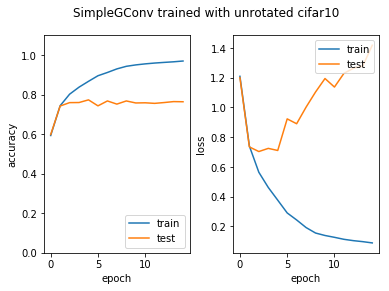

Skipping pretraining rotated model with unrotated dataset
Training rotated model with rotated dataset...


Epoch 1: 100% (batch 782/782)  ==stats==> loss:   1.67, accuracy:  0.402, Time:  0:04:02


Test => Loss: 1.6286, Accuracy: 43.13% (4313/10000)


Epoch 2: 100% (batch 782/782)  ==stats==> loss:   1.32, accuracy:  0.527, Time:  0:03:58


Test => Loss: 1.2211, Accuracy: 56.62% (5662/10000)


Epoch 3: 100% (batch 782/782)  ==stats==> loss:   1.17, accuracy:  0.584, Time:  0:03:59


Test => Loss: 1.1257, Accuracy: 60.59% (6059/10000)


Epoch 4: 100% (batch 782/782)  ==stats==> loss:   1.08, accuracy:  0.616, Time:  0:03:54


Test => Loss: 1.0646, Accuracy: 62.45% (6245/10000)


Epoch 5: 100% (batch 782/782)  ==stats==> loss:   1.01, accuracy:  0.642, Time:  0:02:46


Test => Loss: 1.0632, Accuracy: 63.41% (6341/10000)


Epoch 6: 100% (batch 782/782)  ==stats==> loss:  0.965, accuracy:   0.66, Time:  0:01:52


Test => Loss: 0.9788, Accuracy: 66.67% (6667/10000)


Epoch 7: 100% (batch 782/782)  ==stats==> loss:  0.926, accuracy:  0.675, Time:  0:02:08


Test => Loss: 1.0044, Accuracy: 65.91% (6591/10000)


Epoch 8: 100% (batch 782/782)  ==stats==> loss:  0.897, accuracy:  0.686, Time:  0:01:59


Test => Loss: 0.9058, Accuracy: 68.73% (6873/10000)


Epoch 9: 100% (batch 782/782)  ==stats==> loss:  0.873, accuracy:  0.696, Time:  0:02:09


Test => Loss: 0.9141, Accuracy: 68.20% (6820/10000)


Epoch 10: 100% (batch 782/782)  ==stats==> loss:  0.845, accuracy:  0.703, Time:  0:02:07


Test => Loss: 0.9027, Accuracy: 68.12% (6812/10000)


Epoch 11: 100% (batch 782/782)  ==stats==> loss:   0.82, accuracy:  0.713, Time:  0:02:04


Test => Loss: 0.8711, Accuracy: 69.76% (6976/10000)


Epoch 12: 100% (batch 782/782)  ==stats==> loss:  0.804, accuracy:  0.719, Time:  0:02:03


Test => Loss: 0.8806, Accuracy: 69.46% (6946/10000)


Epoch 13: 100% (batch 782/782)  ==stats==> loss:  0.785, accuracy:  0.726, Time:  0:02:05


Test => Loss: 0.8911, Accuracy: 68.94% (6894/10000)


Epoch 14: 100% (batch 782/782)  ==stats==> loss:  0.776, accuracy:  0.728, Time:  0:02:00


Test => Loss: 0.8605, Accuracy: 70.23% (7023/10000)


Epoch 15: 100% (batch 782/782)  ==stats==> loss:  0.755, accuracy:  0.737, Time:  0:02:06


Test => Loss: 0.8292, Accuracy: 70.95% (7095/10000)


Epoch 16: 100% (batch 782/782)  ==stats==> loss:  0.744, accuracy:   0.74, Time:  0:02:04


Test => Loss: 0.8491, Accuracy: 71.18% (7118/10000)


Epoch 17: 100% (batch 782/782)  ==stats==> loss:  0.732, accuracy:  0.743, Time:  0:02:06


Test => Loss: 0.8705, Accuracy: 70.48% (7048/10000)


Epoch 18: 100% (batch 782/782)  ==stats==> loss:  0.723, accuracy:  0.746, Time:  0:02:03


Test => Loss: 0.8948, Accuracy: 69.22% (6922/10000)


Epoch 19: 100% (batch 782/782)  ==stats==> loss:  0.709, accuracy:  0.751, Time:  0:01:54


Test => Loss: 0.8135, Accuracy: 71.74% (7174/10000)


Epoch 20: 100% (batch 782/782)  ==stats==> loss:  0.701, accuracy:  0.756, Time:  0:00:57


Test => Loss: 0.8392, Accuracy: 71.18% (7118/10000)


Epoch 21: 100% (batch 782/782)  ==stats==> loss:  0.695, accuracy:  0.758, Time:  0:00:48


Test => Loss: 0.8107, Accuracy: 72.51% (7251/10000)


Epoch 22: 100% (batch 782/782)  ==stats==> loss:  0.683, accuracy:  0.761, Time:  0:00:46


Test => Loss: 0.8382, Accuracy: 71.41% (7141/10000)


Epoch 23: 100% (batch 782/782)  ==stats==> loss:  0.682, accuracy:  0.763, Time:  0:00:49


Test => Loss: 0.8171, Accuracy: 71.72% (7172/10000)


Epoch 24: 100% (batch 782/782)  ==stats==> loss:  0.667, accuracy:  0.766, Time:  0:00:47


Test => Loss: 0.8058, Accuracy: 72.79% (7279/10000)


Epoch 25: 100% (batch 782/782)  ==stats==> loss:  0.654, accuracy:  0.771, Time:  0:00:48


Test => Loss: 0.8475, Accuracy: 71.90% (7190/10000)


Epoch 26: 100% (batch 782/782)  ==stats==> loss:  0.652, accuracy:  0.772, Time:  0:00:49


Test => Loss: 0.8577, Accuracy: 70.86% (7086/10000)


Epoch 27: 100% (batch 782/782)  ==stats==> loss:  0.644, accuracy:  0.774, Time:  0:00:46


Test => Loss: 0.7903, Accuracy: 73.20% (7320/10000)


Epoch 28: 100% (batch 782/782)  ==stats==> loss:  0.639, accuracy:  0.777, Time:  0:00:48


Test => Loss: 0.7958, Accuracy: 72.81% (7281/10000)


Epoch 29: 100% (batch 782/782)  ==stats==> loss:  0.628, accuracy:  0.779, Time:  0:00:48


Test => Loss: 0.7920, Accuracy: 73.03% (7303/10000)


Epoch 30: 100% (batch 782/782)  ==stats==> loss:  0.626, accuracy:  0.782, Time:  0:00:46


Test => Loss: 0.7914, Accuracy: 73.73% (7373/10000)


Epoch 31: 100% (batch 782/782)  ==stats==> loss:  0.618, accuracy:  0.783, Time:  0:00:48


Test => Loss: 0.8085, Accuracy: 73.15% (7315/10000)


Epoch 32: 100% (batch 782/782)  ==stats==> loss:  0.615, accuracy:  0.784, Time:  0:00:47


Test => Loss: 0.7936, Accuracy: 73.13% (7313/10000)


Epoch 33: 100% (batch 782/782)  ==stats==> loss:  0.607, accuracy:  0.786, Time:  0:00:47


Test => Loss: 0.8412, Accuracy: 71.70% (7170/10000)


Epoch 34: 100% (batch 782/782)  ==stats==> loss:  0.603, accuracy:   0.79, Time:  0:00:49


Test => Loss: 0.7914, Accuracy: 73.91% (7391/10000)


Epoch 35: 100% (batch 782/782)  ==stats==> loss:  0.593, accuracy:  0.792, Time:  0:00:46


Test => Loss: 0.7833, Accuracy: 74.13% (7413/10000)


Epoch 36: 100% (batch 782/782)  ==stats==> loss:  0.592, accuracy:  0.793, Time:  0:00:48


Test => Loss: 0.8256, Accuracy: 72.59% (7259/10000)


Epoch 37: 100% (batch 782/782)  ==stats==> loss:  0.588, accuracy:  0.795, Time:  0:00:46


Test => Loss: 0.7675, Accuracy: 74.07% (7407/10000)


Epoch 38: 100% (batch 782/782)  ==stats==> loss:  0.579, accuracy:  0.796, Time:  0:00:48


Test => Loss: 0.7905, Accuracy: 73.43% (7343/10000)


Epoch 39: 100% (batch 782/782)  ==stats==> loss:  0.579, accuracy:  0.797, Time:  0:00:48


Test => Loss: 0.7693, Accuracy: 74.25% (7425/10000)


Epoch 40: 100% (batch 782/782)  ==stats==> loss:  0.569, accuracy:  0.801, Time:  0:00:47


Test => Loss: 0.7771, Accuracy: 74.41% (7441/10000)


Epoch 41: 100% (batch 782/782)  ==stats==> loss:  0.564, accuracy:  0.801, Time:  0:00:48


Test => Loss: 0.7934, Accuracy: 73.89% (7389/10000)


Epoch 42: 100% (batch 782/782)  ==stats==> loss:  0.565, accuracy:  0.801, Time:  0:00:46


Test => Loss: 0.7611, Accuracy: 74.55% (7455/10000)


Epoch 43: 100% (batch 782/782)  ==stats==> loss:  0.558, accuracy:  0.804, Time:  0:00:49


Test => Loss: 0.7516, Accuracy: 74.50% (7450/10000)


Epoch 44: 100% (batch 782/782)  ==stats==> loss:  0.553, accuracy:  0.807, Time:  0:00:48


Test => Loss: 0.7910, Accuracy: 73.71% (7371/10000)


Epoch 45: 100% (batch 782/782)  ==stats==> loss:  0.552, accuracy:  0.807, Time:  0:00:46


Test => Loss: 0.7779, Accuracy: 74.00% (7400/10000)


Epoch 46: 100% (batch 782/782)  ==stats==> loss:  0.545, accuracy:  0.809, Time:  0:00:49


Test => Loss: 0.7727, Accuracy: 74.89% (7489/10000)


Epoch 47: 100% (batch 782/782)  ==stats==> loss:  0.538, accuracy:  0.811, Time:  0:00:35


Test => Loss: 0.7456, Accuracy: 75.20% (7520/10000)


Epoch 48: 100% (batch 782/782)  ==stats==> loss:  0.541, accuracy:   0.81, Time:  0:00:23


Test => Loss: 0.7644, Accuracy: 74.44% (7444/10000)


Epoch 49: 100% (batch 782/782)  ==stats==> loss:  0.529, accuracy:  0.815, Time:  0:00:18


Test => Loss: 0.7816, Accuracy: 73.83% (7383/10000)


Epoch 50: 100% (batch 782/782)  ==stats==> loss:  0.527, accuracy:  0.815, Time:  0:00:15


Test => Loss: 0.7911, Accuracy: 74.14% (7414/10000)


Epoch 51: 100% (batch 782/782)  ==stats==> loss:  0.528, accuracy:  0.816, Time:  0:00:15


Test => Loss: 0.7935, Accuracy: 73.63% (7363/10000)


Epoch 52: 100% (batch 782/782)  ==stats==> loss:  0.522, accuracy:  0.816, Time:  0:00:15


Test => Loss: 0.7550, Accuracy: 74.83% (7483/10000)


Epoch 53: 100% (batch 782/782)  ==stats==> loss:  0.521, accuracy:  0.816, Time:  0:00:15


Test => Loss: 0.8030, Accuracy: 74.04% (7404/10000)


Epoch 54: 100% (batch 782/782)  ==stats==> loss:  0.515, accuracy:  0.818, Time:  0:00:15


Test => Loss: 0.7611, Accuracy: 74.49% (7449/10000)


Epoch 55: 100% (batch 782/782)  ==stats==> loss:  0.508, accuracy:  0.822, Time:  0:00:15


Test => Loss: 0.7771, Accuracy: 74.32% (7432/10000)


Epoch 56: 100% (batch 782/782)  ==stats==> loss:  0.509, accuracy:  0.821, Time:  0:00:15


Test => Loss: 0.7807, Accuracy: 75.14% (7514/10000)


Epoch 57: 100% (batch 782/782)  ==stats==> loss:  0.506, accuracy:  0.824, Time:  0:00:15


Test => Loss: 0.7670, Accuracy: 75.12% (7512/10000)


Epoch 58: 100% (batch 782/782)  ==stats==> loss:  0.502, accuracy:  0.823, Time:  0:00:15


Test => Loss: 0.7365, Accuracy: 75.92% (7592/10000)


Epoch 59: 100% (batch 782/782)  ==stats==> loss:  0.495, accuracy:  0.825, Time:  0:00:15


Test => Loss: 0.7850, Accuracy: 74.46% (7446/10000)


Epoch 60: 100% (batch 782/782)  ==stats==> loss:  0.491, accuracy:  0.828, Time:  0:00:15


Test => Loss: 0.7612, Accuracy: 75.82% (7582/10000)


Epoch 61: 100% (batch 782/782)  ==stats==> loss:  0.495, accuracy:  0.825, Time:  0:00:15


Test => Loss: 0.7853, Accuracy: 74.45% (7445/10000)


Epoch 62: 100% (batch 782/782)  ==stats==> loss:  0.489, accuracy:  0.828, Time:  0:00:15


Test => Loss: 0.7860, Accuracy: 75.16% (7516/10000)


Epoch 63: 100% (batch 782/782)  ==stats==> loss:  0.486, accuracy:   0.83, Time:  0:00:15


Test => Loss: 0.7542, Accuracy: 76.02% (7602/10000)


Epoch 64: 100% (batch 782/782)  ==stats==> loss:  0.481, accuracy:  0.831, Time:  0:00:15


Test => Loss: 0.7831, Accuracy: 75.30% (7530/10000)


Epoch 65: 100% (batch 782/782)  ==stats==> loss:  0.477, accuracy:  0.831, Time:  0:00:15


Test => Loss: 0.7454, Accuracy: 76.13% (7613/10000)


Epoch 66: 100% (batch 782/782)  ==stats==> loss:  0.475, accuracy:  0.833, Time:  0:00:15


Test => Loss: 0.8068, Accuracy: 74.38% (7438/10000)


Epoch 67: 100% (batch 782/782)  ==stats==> loss:  0.476, accuracy:  0.832, Time:  0:00:15


Test => Loss: 0.7485, Accuracy: 75.40% (7540/10000)


Epoch 68: 100% (batch 782/782)  ==stats==> loss:  0.473, accuracy:  0.833, Time:  0:00:15


Test => Loss: 0.7525, Accuracy: 75.54% (7554/10000)


Epoch 69: 100% (batch 782/782)  ==stats==> loss:  0.467, accuracy:  0.836, Time:  0:00:15


Test => Loss: 0.7618, Accuracy: 75.11% (7511/10000)


Epoch 70: 100% (batch 782/782)  ==stats==> loss:  0.467, accuracy:  0.836, Time:  0:00:15


Test => Loss: 0.7515, Accuracy: 75.04% (7504/10000)


Epoch 71: 100% (batch 782/782)  ==stats==> loss:  0.467, accuracy:  0.836, Time:  0:00:15


Test => Loss: 0.7422, Accuracy: 75.21% (7521/10000)


Epoch 72: 100% (batch 782/782)  ==stats==> loss:  0.464, accuracy:  0.838, Time:  0:00:15


Test => Loss: 0.7557, Accuracy: 75.63% (7563/10000)


Epoch 73: 100% (batch 782/782)  ==stats==> loss:  0.455, accuracy:  0.841, Time:  0:00:15


Test => Loss: 0.8052, Accuracy: 74.44% (7444/10000)


Epoch 74: 100% (batch 782/782)  ==stats==> loss:  0.459, accuracy:  0.838, Time:  0:00:15


Test => Loss: 0.7364, Accuracy: 76.20% (7620/10000)


Epoch 75: 100% (batch 782/782)  ==stats==> loss:  0.456, accuracy:  0.839, Time:  0:00:15


Test => Loss: 0.7584, Accuracy: 76.16% (7616/10000)


Epoch 76: 100% (batch 782/782)  ==stats==> loss:  0.447, accuracy:  0.844, Time:  0:00:15


Test => Loss: 0.7649, Accuracy: 75.99% (7599/10000)


Epoch 77: 100% (batch 782/782)  ==stats==> loss:  0.448, accuracy:  0.842, Time:  0:00:15


Test => Loss: 0.7459, Accuracy: 75.68% (7568/10000)


Epoch 78: 100% (batch 782/782)  ==stats==> loss:   0.45, accuracy:  0.841, Time:  0:00:15


Test => Loss: 0.7808, Accuracy: 75.11% (7511/10000)


Epoch 79: 100% (batch 782/782)  ==stats==> loss:  0.447, accuracy:  0.842, Time:  0:00:15


Test => Loss: 0.7739, Accuracy: 75.92% (7592/10000)


Epoch 80: 100% (batch 782/782)  ==stats==> loss:  0.443, accuracy:  0.843, Time:  0:00:15


Test => Loss: 0.7921, Accuracy: 75.39% (7539/10000)


Epoch 81: 100% (batch 782/782)  ==stats==> loss:  0.436, accuracy:  0.846, Time:  0:00:15


Test => Loss: 0.7680, Accuracy: 75.91% (7591/10000)


Epoch 82: 100% (batch 782/782)  ==stats==> loss:  0.441, accuracy:  0.845, Time:  0:00:15


Test => Loss: 0.7567, Accuracy: 75.36% (7536/10000)


Epoch 83: 100% (batch 782/782)  ==stats==> loss:  0.435, accuracy:  0.846, Time:  0:00:15


Test => Loss: 0.7523, Accuracy: 76.32% (7632/10000)


Epoch 84: 100% (batch 782/782)  ==stats==> loss:  0.437, accuracy:  0.846, Time:  0:00:15


Test => Loss: 0.7528, Accuracy: 75.94% (7594/10000)


Epoch 85: 100% (batch 782/782)  ==stats==> loss:  0.435, accuracy:  0.848, Time:  0:00:14


Test => Loss: 0.7521, Accuracy: 76.34% (7634/10000)


Epoch 86: 100% (batch 782/782)  ==stats==> loss:  0.429, accuracy:   0.85, Time:  0:00:15


Test => Loss: 0.8142, Accuracy: 74.60% (7460/10000)


Epoch 87: 100% (batch 782/782)  ==stats==> loss:  0.429, accuracy:  0.849, Time:  0:00:15


Test => Loss: 0.7663, Accuracy: 75.82% (7582/10000)


Epoch 88: 100% (batch 782/782)  ==stats==> loss:  0.424, accuracy:  0.848, Time:  0:00:13


Test => Loss: 0.7971, Accuracy: 75.19% (7519/10000)


Epoch 89: 100% (batch 782/782)  ==stats==> loss:  0.429, accuracy:  0.848, Time:  0:00:13


Test => Loss: 0.7599, Accuracy: 75.31% (7531/10000)


Epoch 90: 100% (batch 782/782)  ==stats==> loss:  0.426, accuracy:  0.849, Time:  0:00:13


Test => Loss: 0.7959, Accuracy: 75.73% (7573/10000)


Epoch 91: 100% (batch 782/782)  ==stats==> loss:  0.424, accuracy:  0.849, Time:  0:00:13


Test => Loss: 0.7643, Accuracy: 75.82% (7582/10000)


Epoch 92: 100% (batch 782/782)  ==stats==> loss:   0.42, accuracy:  0.852, Time:  0:00:13


Test => Loss: 0.7619, Accuracy: 75.78% (7578/10000)


Epoch 93: 100% (batch 782/782)  ==stats==> loss:  0.422, accuracy:   0.85, Time:  0:00:13


Test => Loss: 0.7827, Accuracy: 75.60% (7560/10000)


Epoch 94: 100% (batch 782/782)  ==stats==> loss:  0.418, accuracy:  0.853, Time:  0:00:09


Test => Loss: 0.8004, Accuracy: 75.65% (7565/10000)


Epoch 95: 100% (batch 782/782)  ==stats==> loss:  0.412, accuracy:  0.852, Time:  0:00:09


Test => Loss: 0.7986, Accuracy: 75.07% (7507/10000)


Epoch 96: 100% (batch 782/782)  ==stats==> loss:  0.413, accuracy:  0.855, Time:  0:00:09


Test => Loss: 0.7877, Accuracy: 75.39% (7539/10000)


Epoch 97: 100% (batch 782/782)  ==stats==> loss:  0.412, accuracy:  0.855, Time:  0:00:09


Test => Loss: 0.7757, Accuracy: 75.66% (7566/10000)


Epoch 98: 100% (batch 782/782)  ==stats==> loss:  0.414, accuracy:  0.854, Time:  0:00:09


Test => Loss: 0.8006, Accuracy: 75.31% (7531/10000)


Epoch 99: 100% (batch 782/782)  ==stats==> loss:   0.41, accuracy:  0.855, Time:  0:00:09


Test => Loss: 0.7649, Accuracy: 75.74% (7574/10000)


Epoch 100: 100% (batch 782/782)  ==stats==> loss:  0.405, accuracy:  0.857, Time:  0:00:09


Test => Loss: 0.7751, Accuracy: 75.98% (7598/10000)


Epoch 101: 100% (batch 782/782)  ==stats==> loss:  0.408, accuracy:  0.855, Time:  0:00:09


Test => Loss: 0.7790, Accuracy: 75.97% (7597/10000)


Epoch 102: 100% (batch 782/782)  ==stats==> loss:  0.397, accuracy:  0.859, Time:  0:00:09


Test => Loss: 0.8007, Accuracy: 75.49% (7549/10000)


Epoch 103: 100% (batch 782/782)  ==stats==> loss:  0.405, accuracy:  0.856, Time:  0:00:09


Test => Loss: 0.7832, Accuracy: 76.00% (7600/10000)


Epoch 104: 100% (batch 782/782)  ==stats==> loss:  0.408, accuracy:  0.855, Time:  0:00:09


Test => Loss: 0.8028, Accuracy: 75.56% (7556/10000)


Epoch 105: 100% (batch 782/782)  ==stats==> loss:  0.397, accuracy:  0.858, Time:  0:00:09


Test => Loss: 0.7784, Accuracy: 75.76% (7576/10000)


Epoch 106: 100% (batch 782/782)  ==stats==> loss:  0.397, accuracy:  0.858, Time:  0:00:09


Test => Loss: 0.8251, Accuracy: 75.50% (7550/10000)


Epoch 107: 100% (batch 782/782)  ==stats==> loss:  0.403, accuracy:  0.857, Time:  0:00:09


Test => Loss: 0.7944, Accuracy: 75.76% (7576/10000)


Epoch 108: 100% (batch 782/782)  ==stats==> loss:  0.397, accuracy:  0.859, Time:  0:00:09


Test => Loss: 0.7705, Accuracy: 75.69% (7569/10000)


Epoch 109: 100% (batch 782/782)  ==stats==> loss:  0.398, accuracy:  0.859, Time:  0:00:09


Test => Loss: 0.8374, Accuracy: 75.38% (7538/10000)


Epoch 110: 100% (batch 782/782)  ==stats==> loss:  0.398, accuracy:  0.859, Time:  0:00:09


Test => Loss: 0.8311, Accuracy: 75.42% (7542/10000)


Epoch 111: 100% (batch 782/782)  ==stats==> loss:  0.392, accuracy:  0.862, Time:  0:00:09


Test => Loss: 0.7959, Accuracy: 75.83% (7583/10000)


Epoch 112: 100% (batch 782/782)  ==stats==> loss:  0.391, accuracy:  0.861, Time:  0:00:09


Test => Loss: 0.8095, Accuracy: 75.66% (7566/10000)


Epoch 113: 100% (batch 782/782)  ==stats==> loss:  0.393, accuracy:  0.861, Time:  0:00:09


Test => Loss: 0.8465, Accuracy: 74.60% (7460/10000)


Epoch 114: 100% (batch 782/782)  ==stats==> loss:  0.391, accuracy:  0.861, Time:  0:00:09


Test => Loss: 0.7827, Accuracy: 75.74% (7574/10000)


Epoch 115: 100% (batch 782/782)  ==stats==> loss:  0.387, accuracy:  0.862, Time:  0:00:09


Test => Loss: 0.7576, Accuracy: 76.26% (7626/10000)


Epoch 116: 100% (batch 782/782)  ==stats==> loss:  0.387, accuracy:  0.863, Time:  0:00:09


Test => Loss: 0.7909, Accuracy: 76.08% (7608/10000)


Epoch 117: 100% (batch 782/782)  ==stats==> loss:  0.391, accuracy:  0.862, Time:  0:00:09


Test => Loss: 0.7783, Accuracy: 75.88% (7588/10000)


Epoch 118: 100% (batch 782/782)  ==stats==> loss:  0.383, accuracy:  0.865, Time:  0:00:09


Test => Loss: 0.8345, Accuracy: 74.73% (7473/10000)


Epoch 119: 100% (batch 782/782)  ==stats==> loss:  0.381, accuracy:  0.864, Time:  0:00:09


Test => Loss: 0.7965, Accuracy: 75.73% (7573/10000)


Epoch 120: 100% (batch 782/782)  ==stats==> loss:  0.382, accuracy:  0.864, Time:  0:00:09


Test => Loss: 0.8475, Accuracy: 75.79% (7579/10000)


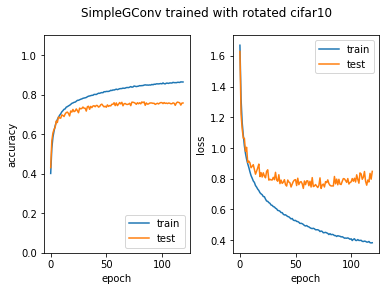

Testing both models on both datasets...


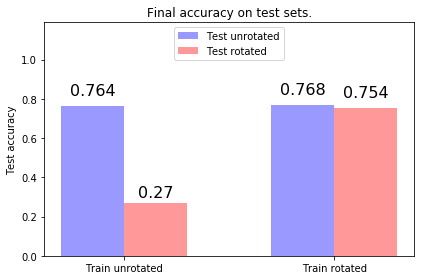

model_rotated_test_dataset score: loss=8.114750, accuracy=0.270300
model_rotated_train_dataset score: loss=7.928875, accuracy=0.285300
model_test_dataset score: loss=1.418207, accuracy=0.764100
model_train_dataset score: loss=0.048515, accuracy=0.983240
rotated_model_rotated_test_dataset score: loss=0.851434, accuracy=0.753800
rotated_model_rotated_train_dataset score: loss=0.381626, accuracy=0.865540
rotated_model_test_dataset score: loss=0.803794, accuracy=0.768000
rotated_model_train_dataset score: loss=0.321024, accuracy=0.886460


In [5]:
import pytorch_experiment
batch_size = 64

epochs={'cifar10':15,'mnist':4,'fashion_mnist':12,'cluttered_mnist':10,'lsa16':15,'mnist_rot':5,'pugeault':15}

rotated_epochs={'cifar10':120,'mnist':20,'fashion_mnist':60,'cluttered_mnist':30,'lsa16':100,'mnist_rot':5,'pugeault':40}

config=pytorch_experiment.TrainRotatedConfig(dataset_name=dataset,batch_size=batch_size,
                   epochs=epochs[dataset],rotated_epochs=rotated_epochs[dataset],
                   pre_rotated_epochs=0, optimizer=optimizer,rotated_optimizer=rotated_optimizer,
                  use_cuda=use_cuda)

scores=pytorch_experiment.train_rotated(config,model,rotated_model,
                                        x_train,y_train,x_test,y_test,plot_accuracy=True)


for k,v in scores.items():
    print('%s score: loss=%f, accuracy=%f' % (k,v[0],v[1]))


In [6]:
from datetime import datetime

output_file="results/gconv.txt"
general_message="%s\nResults on dataset %s with model %s and rotated model %s\n" % (str(datetime.now()),dataset,model.name,rotated_model.name)
pytorch_experiments.write_scores(scores,output_file,general_message,config=config)


NameError: name 'pytorch_experiments' is not defined